In [1]:
from loaders import *
from workloads import *
from utils import *
from network import *
from plot import *

In [2]:
# return num cycles and energy
def get_zero_result(workload, num_gpus, pe_meshX, pe_meshY, network_class, **kwargs):
    workload['batch_size'] = num_gpus # simplify the simulation
    zero_config = get_zero_config(workload, pe_meshX, pe_meshY)
    zero_result = run_timeloop_model(
        zero_config,
        architecture='designs/architecture/arch.yaml',
        mapping='designs/architecture/map.yaml',
        problem='layer_shapes/workload.yaml'
    )
    network_model = network_class(num_gpus)
    cycles = get_zero_cycles(zero_result, network_model, workload)
    energy = get_zero_energy(zero_result, network_model, workload)
    return cycles, energy 

In [3]:
# return num cycles and energy
def get_data_result(workload, num_gpus, pe_meshX, pe_meshY, **kwargs):
    workload['batch_size'] = num_gpus # simplify the simulation
    data_config = get_data_config(workload, pe_meshX, pe_meshY)
    data_result = run_timeloop_model(
        data_config,
        architecture='designs/architecture/arch.yaml',
        mapping='designs/architecture/map.yaml',
        problem='layer_shapes/workload.yaml'
    )
    cycles = get_data_cycles(data_result)
    energy = get_data_energy(data_result)
    return cycles, energy 

In [4]:
def run(workload, config):
    zero_cycle, zero_energy = get_zero_result(workload, **config)
    zero_transfer = get_zero_network_transfer(workload)
    data_cycle, data_energy = get_data_result(workload, **config)
    return dict(zero_cycle=zero_cycle, 
            zero_energy=zero_energy, 
            zero_transfer=zero_transfer, 
            data_cycle=data_cycle, 
            data_energy=data_energy,
           )

def run_workloads(workloads, config): 
    zero_cycles = []
    zero_energies = []
    zero_transfers = []
    data_cycles = []
    data_energies = []
    for workload in workloads:
        result = run(workload, config)
        zero_cycles.append(result['zero_cycle'])
        zero_energies.append(result['zero_energy'])
        zero_transfers.append(result['zero_transfer'])
        data_cycles.append(result['data_cycle'])
        data_energies.append(result['data_energy'])
        
    return dict(zero_cycles=zero_cycles, 
                zero_energies=zero_energies, 
                zero_transfers=zero_transfers, 
                data_cycles=data_cycles, 
                data_energies=data_energies,
                **config
               )

def run_configs(workload, configs):
    zero_cycles = []
    zero_energies = []
    zero_transfers = []
    data_cycles = []
    data_energies = []
    for config in configs:
        result = run(workload, config)
        zero_cycles.append(result['zero_cycle'])
        zero_energies.append(result['zero_energy'])
        zero_transfers.append(result['zero_transfer'])
        data_cycles.append(result['data_cycle'])
        data_energies.append(result['data_energy'])
        
    return dict(zero_cycles=zero_cycles, 
                zero_energies=zero_energies, 
                zero_transfers=zero_transfers, 
                data_cycles=data_cycles, 
                data_energies=data_energies,
                configs=configs,
                workload=workload
               )

In [11]:
arch_conf = dict(
            pe_meshX=4,
            pe_meshY=4,
            network_class=LinearModel
    )

configs = [
    dict(num_gpus=2, **arch_conf),
    dict(num_gpus=4, **arch_conf),
    dict(num_gpus=8, **arch_conf),
    dict(num_gpus=16, **arch_conf),
    dict(num_gpus=32, **arch_conf),
]
        
result_fc1_gpus = run_configs(fc1, configs)

[INFO] 2025-04-27 04:50:08,913 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-27 04:50:16,043 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-27 04:50:23,223 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-27 04:50:30,386 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-27 04:50:37,562 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-27 04:50:44,723 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-27 04:50:51,899 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-27 04:50:59,183 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-27 04:51:06,374 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-27 04:51:13,786 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


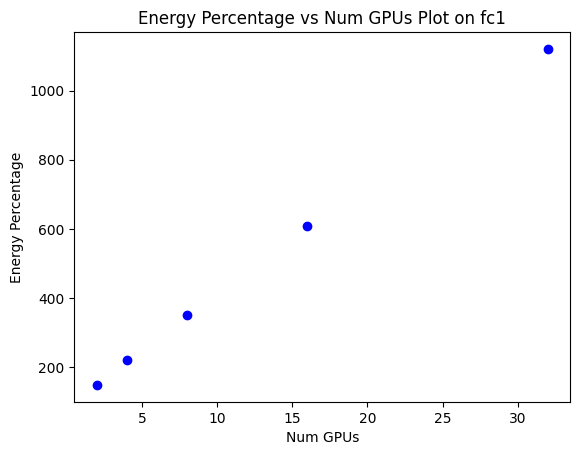

In [12]:
plot_energy_gpus(**result_fc1_gpus)

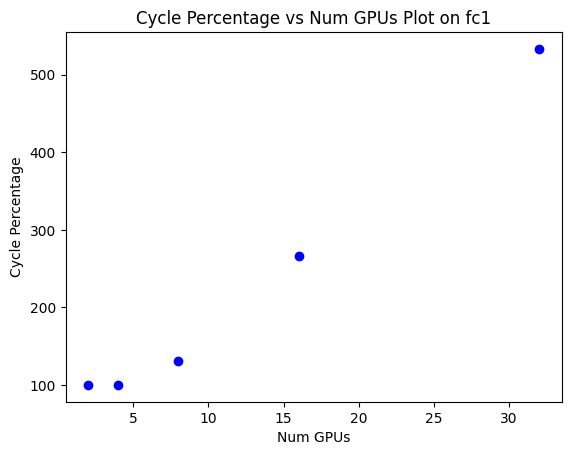

In [13]:
plot_cycle_gpus(**result_fc1_gpus)

In [14]:
result_conv1_gpus = run_configs(conv1, configs)

[INFO] 2025-04-27 04:51:21,141 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-27 04:51:29,072 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-27 04:51:36,275 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-27 04:51:44,488 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-27 04:51:51,943 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-27 04:51:59,183 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-27 04:52:06,421 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-27 04:52:13,702 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-27 04:52:20,945 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-04-27 04:52:28,184 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


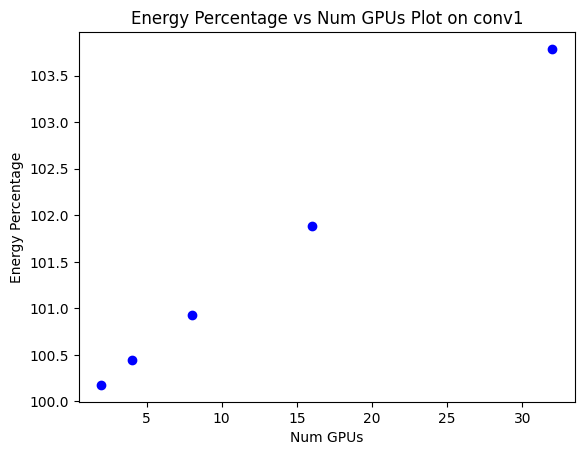

In [17]:
plot_energy_gpus(**result_conv1_gpus)

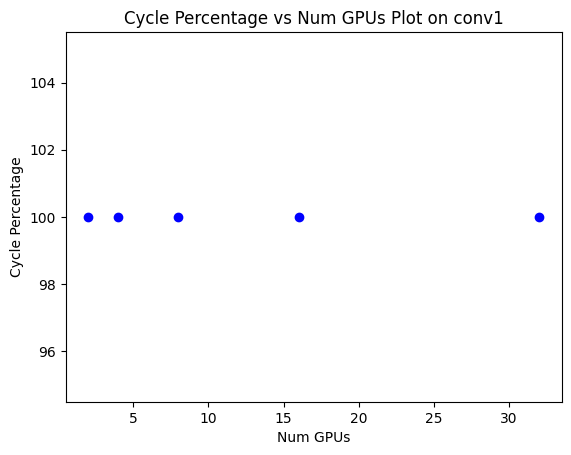

In [18]:
plot_cycle_gpus(**result_conv1_gpus)

In [ ]:
arch_conf = dict(
            num_gpus=4,
            pe_meshY=4,
            network_class=LinearModel
    )

configs = [
    dict(pe_meshX=1, **arch_conf),
    dict(pe_meshX=2, **arch_conf),
    dict(pe_meshX=4, **arch_conf),
    dict(pe_meshX=6, **arch_conf),
    dict(pe_meshX=8, **arch_conf),
]
        
result = run_configs(fc2, configs)

In [ ]:
arch_conf = dict(
            pe_meshX=4,
            pe_meshY=4,
            network_class=LinearModel
    )

configs = [
    dict(num_gpus=6, **arch_conf),
    dict(num_gpus=7, **arch_conf),
    dict(num_gpus=8, **arch_conf),
    dict(num_gpus=9, **arch_conf),
    dict(num_gpus=10, **arch_conf),
]
        
result_linear = run_configs(fc2, configs)

In [ ]:
arch_conf = dict(
            pe_meshX=4,
            pe_meshY=4,
            network_class=RingModel
    )

configs = [
    dict(num_gpus=6, **arch_conf),
    dict(num_gpus=7, **arch_conf),
    dict(num_gpus=8, **arch_conf),
    dict(num_gpus=9, **arch_conf),
    dict(num_gpus=10, **arch_conf),
]
        
result_ring = run_configs(fc2, configs)

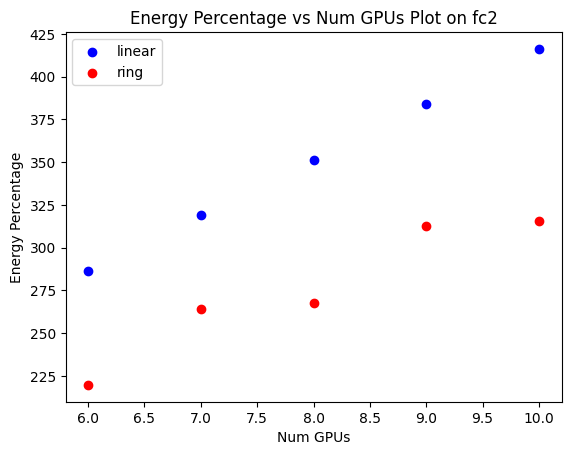

In [13]:
plot_energy_models(result_linear, result_ring)

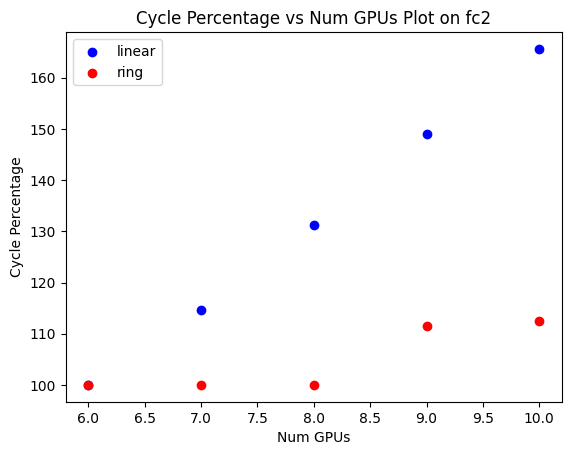

In [14]:
plot_cycle_models(result_linear, result_ring)